## Scenario:
You are employed at an ABC startup specializing in movie recommendations. The company aims to integrate a recommendation system based on collaborative filtering. A dataset comprising user ratings for numerous movies has already been gathered. The Chief Product Officer has approached you to develop this recommendation system.

## Problem Statement:
You are assigned the responsibility of constructing and assessing a recommendation system employing both memory-based and collaborative filtering methods. Extract meaningful insights from the data and document your observations. You can access the dataset through the following link:


## Data Description
The dataset we are going to use cotains 100k ratings of approximately 9000 movies by 700 users.

### Ratings.csv
- userId - Every user is represented by an unique Id.
- movieId - Every movie is represented by an unique Id.
- rating - Represents the rating given by the user to the corresponding movie.
- timestamp - The time at which the rating was recorded.

### Movies.csv:
- movieId - Every movie is represented by an unique Id.
- title - Movie which is represented by the corresponding movieId.
- genres - Represents category of the movie.

## Directions:

### Importing the Libraries

* Load the necessary libraries to begin the analysis and visualization process. Ignore warnings to maintain a clean output.

### Load and Merge Datasets

* Load the "movies.csv" and "ratings.csv" datasets, which contain information about movies and user ratings, respectively.
* Combine both data frames using the common attribute "movieId" to create a unified view of the data for analysis and recommendations.

### Visualizations on the Dataset

* Explore the dataset visually to gain insights into its content and distribution.

###  Create User-Item Matrix

* Build a User-Item Matrix, where rows represent users and columns represent movies. Each cell contains the rating given by a user to a specific movie.

###  Memory-Based Collaborative Filtering

### User-based Collaborative Filtering

* Fill the NaN values in the User-Item Matrix with the mean ratings of corresponding users. This prepares the data for calculating user similarities.
* Calculate Pearson correlation coefficients between users to determine how similar their preferences are.
* Choose the correlation values of all users with User 1 for further analysis.
* Sort the user 1 correlations in descending order to identify the most similar users.
* Remove the NaN values generated during correlation calculation for accurate analysis.
* Select the top 50 users that exhibit high correlation with User 1, indicating similarity in preferences.
* Predict the rating that User 1 might give to the movie with movieId 32. This prediction is based on the ratings of the top 50 similar users.

### Item-based Collaborative Filtering

* Fill the NaN values in the User-Item Matrix columns with the mean ratings of corresponding movies. This prepares the data for calculating movie similarities.
* Calculate Pearson correlation coefficients between movies to identify how similar they are in terms of user ratings.
* Choose the correlation values of all movies with the movie "Jurassic Park (1993)" for further analysis.
* Sort the correlations for the movie "Jurassic Park (1993)" in descending order to identify the most similar movies.
* Eliminate the NaN values in the correlation matrix for accurate analysis.
* Identify the top 10 movies that are most similar to the movie "Jurassic Park (1993)" based on correlation.


### Importing the Libraries

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import math  # For mathematical functions
import itertools  # For creating iterators for efficient looping

# Import modeling helpers
from sklearn.preprocessing import Normalizer, scale  # For data preprocessing
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import confusion_matrix  # For evaluating classification results
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score  # For hyperparameter tuning and cross-validation

# Import evaluation metrics for regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error

# Import evaluation metrics for classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Import visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualizations
%matplotlib inline
mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style='whitegrid', color_codes=True)


In [ ]:
# Center all plots using IPython display
from IPython.core.display import HTML

# Apply CSS style to center plots
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

# Configure visualization parameters for improved appearance
params = {
    'axes.labelsize': "large",  # Set label font size for axes
    'xtick.labelsize': 'x-large',  # Set label font size for x-axis ticks
    'legend.fontsize': 20,  # Set font size for legend
    'figure.dpi': 150,  # Set DPI (dots per inch) for figure
    'figure.figsize': [25, 7]  # Set figure size
}

# Update Matplotlib parameters with the configured values
plt.rcParams.update(params)



### Load movies.csv and ratings.csv dataset

In [ ]:
# Read the 'ratings.csv' file into a DataFrame
ratings = pd.read_csv('ratings.csv')

# Read the 'movies.csv' file into a DataFrame
movies = pd.read_csv('movies.csv')

# Create a copy of the 'ratings' DataFrame for further processing
df_r = ratings.copy()

# Create a copy of the 'movies' DataFrame for further processing
df_m = movies.copy()



### Ratings

In [ ]:
# Display the first few rows of the 'ratings' DataFrame
ratings.head()

# Get the dimensions (rows, columns) of the 'ratings' DataFrame
ratings.shape

# Generate descriptive statistics for the 'ratings' DataFrame
ratings.describe()


userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09

### Provide the observation

In [ ]:
# Drop the 'timestamp' column from the 'ratings' DataFrame
ratings.drop(['timestamp'], axis=1, inplace=True)


In [ ]:
# Display the first few rows of the modified 'ratings' DataFrame
ratings.head()


userId  movieId  rating
0       1        1     4.0
1       1        3     4.0
2       1        6     4.0
3       1       47     5.0
4       1       50     5.0


### Movies

In [ ]:
# Display the first few rows of the 'movies' DataFrame
movies.head()


movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [ ]:
# Print the dimensions (rows and columns) of the 'movies' DataFrame
print('Shape: ', movies.shape, '\n')

# Display concise information about the 'movies' DataFrame
movies.info()


Shape:  (9742, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB



###  Merge both data frames on movieid


In [ ]:
# Combine the 'ratings' and 'movies' DataFrames based on the 'movieId' column
df_combined = pd.merge(ratings, movies, on='movieId')

# Print the dimensions (rows and columns) of the combined DataFrame
df_combined.shape

# Display the first few rows of the combined DataFrame
df_combined.head()


userId  movieId  rating             title  \
0       1        1     4.0  Toy Story (1995)   
1       5        1     4.0  Toy Story (1995)   
2       7        1     4.5  Toy Story (1995)   
3      15        1     2.5  Toy Story (1995)   
4      17        1     4.5  Toy Story (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1  Adventure|Animation|Children|Comedy|Fantasy  
2  Adventure|Animation|Children|Comedy|Fantasy  
3  Adventure|Animation|Children|Comedy|Fantasy  
4  Adventure|Animation|Children|Comedy|Fantasy


### Visualizations on the Dataset

In [ ]:
# Create an empty dictionary to store the count of different genre values
genres = {}

# Define a function to find and count genres in the dataset
def find_genres():
    # Iterate through each movie's genre information in the dataset
    for genre in movies['genres']:
        # Split the genre string into individual words using the '|' separator
        words = genre.split('|')

        # Iterate through each individual word in the split genre
        for word in words:
            # Increment the count of the genre in the genres dictionary
            # If the genre is already in the dictionary, increment its count by 1
            # If the genre is not in the dictionary, add it with a count of 1
            genres[word] = genres.get(word, 0) + 1

# Call the function to populate the genres dictionary with genre counts
find_genres()


In [ ]:
genres

{'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Fantasy': 779,
 'Romance': 1596,
 'Drama': 4361,
 'Action': 1828,
 'Crime': 1199,
 'Thriller': 1894,
 'Horror': 978,
 'Mystery': 573,
 'Sci-Fi': 980,
 'War': 382,
 'Musical': 334,
 'Documentary': 440,
 'IMAX': 158,
 'Western': 167,
 'Film-Noir': 87,
 '(no genres listed)': 34}

In [ ]:
# Replace the genre key '(no genres listed)' with the key 'None'
# and update its corresponding value
genres['None'] = genres.pop('(no genres listed)')


In [ ]:
# Create a DataFrame 'df_n_ratings' by grouping 'df_combined' by movie title and calculating the mean rating
df_n_ratings = pd.DataFrame(df_combined.groupby('title')['rating'].mean())

# Calculate the total number of ratings for each movie title and add it as a new column in 'df_n_ratings'
df_n_ratings['total ratings'] = pd.DataFrame(df_combined.groupby('title')['rating'].count())

# Rename the 'rating' column to 'mean ratings' in the 'df_n_ratings' DataFrame
df_n_ratings.rename(columns={'rating': 'mean ratings'}, inplace=True)

# Sort the 'df_n_ratings' DataFrame in descending order based on the 'total ratings' column,
# and retrieve the top 10 movies with the highest total ratings
df_n_ratings.sort_values('total ratings', ascending=False).head(10)


mean ratings  total ratings
title                                                                 
Forrest Gump (1994)                            4.164134            329
Shawshank Redemption, The (1994)               4.429022            317
Pulp Fiction (1994)                            4.197068            307
Silence of the Lambs, The (1991)               4.161290            279
Matrix, The (1999)                             4.192446            278
Star Wars: Episode IV - A New Hope (1977)      4.231076            251
Jurassic Park (1993)                           3.750000            238
Braveheart (1995)                              4.031646            237
Terminator 2: Judgment Day (1991)              3.970982            224
Schindler's List (1993)                        4.225000            220

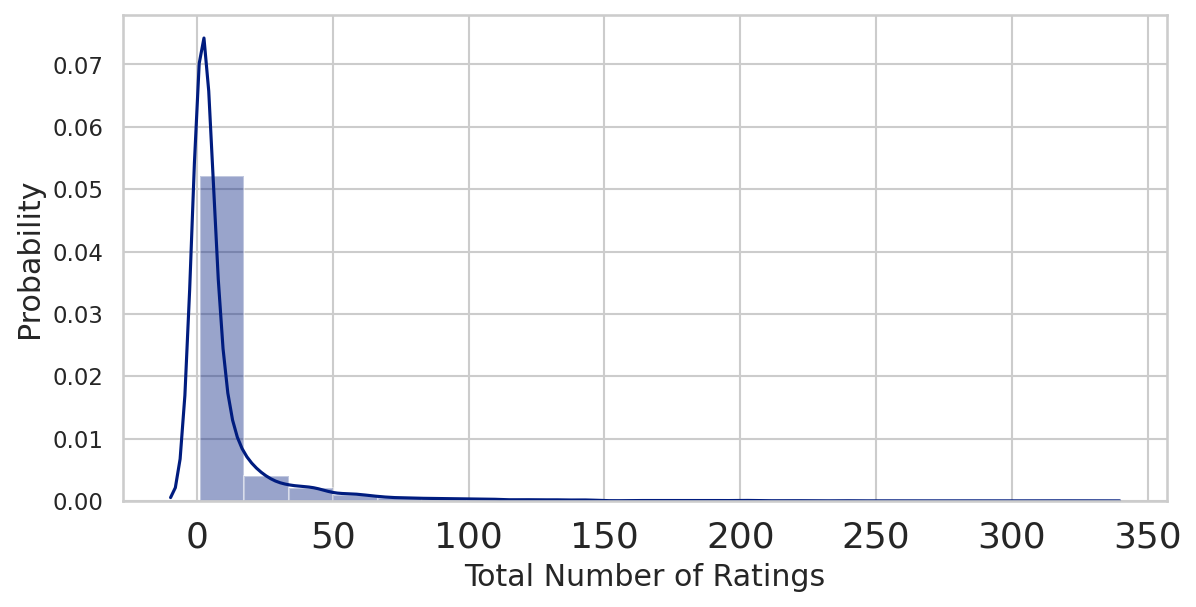

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(8, 4))

# Create a distribution plot (histogram) of the 'total ratings' column from the 'df_n_ratings' DataFrame
# with 20 bins to represent the data distribution
sns.distplot(df_n_ratings['total ratings'], bins=20)

# Set the label for the x-axis
plt.xlabel('Total Number of Ratings')

# Set the label for the y-axis
plt.ylabel('Probability')

# Display the plot
plt.show()

In [ ]:
# Sort the 'df_n_ratings' DataFrame in descending order based on the 'mean ratings' column,
# and retrieve the top 10 movies with the highest mean ratings
df_n_ratings.sort_values('mean ratings', ascending=False).head(10)


mean ratings  total ratings
title                                                                 
Gena the Crocodile (1969)                           5.0              1
True Stories (1986)                                 5.0              1
Cosmic Scrat-tastrophe (2015)                       5.0              1
Love and Pigeons (1985)                             5.0              1
Red Sorghum (Hong gao liang) (1987)                 5.0              1
Thin Line Between Love and Hate, A (1996)           5.0              1
Lesson Faust (1994)                                 5.0              2
Eva (2011)                                          5.0              1
Who Killed Chea Vichea? (2010)                      5.0              1
Siam Sunset (1999)                                  5.0              1

In [ ]:
# Printing the total number of users who gave a rating of 5.0
print('Total no of users that gave rating of 5.0 : ', len(df_n_ratings.loc[df_n_ratings['mean ratings'] == 5]), '\n')

# Printing the total number of individual users who gave a rating of 5.0
print('Total no of Individual users that gave rating of 5.0 : ', len(df_n_ratings.loc[(df_n_ratings['mean ratings'] == 5)
                                                                           & (df_n_ratings['total ratings'] == 1)]))


Total no of users that gave rating of 5.0 :  296 

Total no of Individual users that gave rating of 5.0 :  289


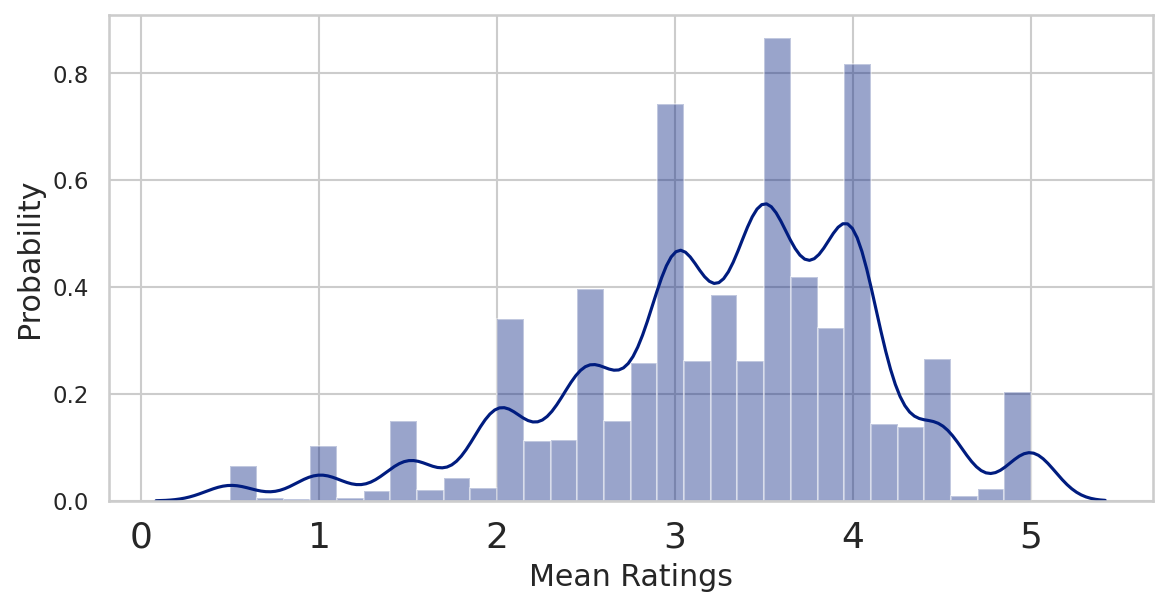

In [ ]:
# Creating a new figure for the plot with a specified size
plt.figure(figsize=(8, 4))

# Creating a distribution plot (histogram and kernel density estimate) of the 'mean ratings' column
sns.distplot(df_n_ratings['mean ratings'], bins=30)

# Adding a label to the x-axis of the plot
plt.xlabel('Mean Ratings')

# Adding a label to the y-axis of the plot
plt.ylabel('Probability')

# Displaying the plot
plt.show()


### Provide the observation


### Collaborative Filtering (CF)


### Create User-Item Matrix

In [ ]:
# Creating a utility matrix using the pivot_table function.
# The 'userId' column will be used as the index, 'title' column as columns, and 'rating' column as values.
util_mat = df_combined.pivot_table(index='userId', columns='title', values='rating')

# Displaying the first 20 rows of the utility matrix.
util_mat.head(20)


title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              NaN                                      NaN   
2              NaN                                      NaN   
3              NaN                                      NaN   
4              NaN                                      NaN   
5              NaN                                      NaN   
6              NaN                                      NaN   
7              NaN                                      NaN   
8              NaN                                      NaN   
9              NaN                                      NaN   
10             NaN                                      NaN   
11             NaN                                      NaN   
12             NaN                                      NaN   
13             NaN                                      NaN   
14             NaN                                      NaN   
15             NaN                                      NaN   
16             NaN                                      NaN   
17             NaN                                      NaN   
18             NaN                                      NaN   
19             NaN                                      NaN   
20             NaN                                      NaN   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          NaN                  NaN   
2                          NaN                  NaN   
3                          NaN                  NaN   
4                          NaN                  NaN   
5                          NaN                  NaN   
6                          NaN                  NaN   
7                          NaN                  NaN   
8                          NaN                  NaN   
9                          NaN                  NaN   
10                         NaN                  NaN   
11                         NaN                  NaN   
12                         NaN                  NaN   
13                         NaN                  NaN   
14                         NaN                  NaN   
15                         NaN                  NaN   
16                         NaN                  NaN   
17                         NaN                  NaN   
18                         NaN                  NaN   
19                         NaN                  NaN   
20                         NaN                  NaN   

title   'Til There Was You (1997)  'Tis the Season for Love (2015)  \
userId                                                               
1                             NaN                              NaN   
2                             NaN                              NaN   
3                             NaN                              NaN   
4                             NaN                              NaN   
5                             NaN                              NaN   
6                             NaN                              NaN   
7                             NaN                              NaN   
8                             NaN                              NaN   
9                             NaN                              NaN   
10                            NaN                              NaN   
11                            NaN                              NaN   
12                            NaN                              NaN   
13                            NaN                              NaN   
14                            NaN                              NaN   
15                            NaN                              NaN   
16                            NaN                              NaN   
17                            NaN                              NaN   
18                            NaN                              NaN   
19


#### Memory Based Collaborative Filtering


### User based Collaborative Filtering

* Fill the row-wise NaNs in the User-Item Matrix with the corresponding user's mean ratings, and find the Pearson correlation between users

In [ ]:
# Creating a copy of the utility matrix to work with.
user_util_matrix = util_mat.copy()

# Filling the NaN values in the utility matrix rows with the corresponding user's mean ratings.
# This step is necessary for calculating Pearson correlation, and it assumes average ratings for unrated movies.
user_util_matrix = user_util_matrix.apply(lambda row: row.fillna(row.mean()), axis=1)

# Displaying the first 5 rows of the modified utility matrix.
user_util_matrix.head(5)


title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1         4.366379                                 4.366379   
2         3.948276                                 3.948276   
3         2.435897                                 2.435897   
4         3.555556                                 3.555556   
5         3.636364                                 3.636364   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                     4.366379             4.366379   
2                     3.948276             3.948276   
3                     2.435897             2.435897   
4                     3.555556             3.555556   
5                     3.636364             3.636364   

title   'Til There Was You (1997)  'Tis the Season for Love (2015)  \
userId                                                               
1                        4.366379                         4.366379   
2                        3.948276                         3.948276   
3                        2.435897                         2.435897   
4                        3.555556                         3.555556   
5                        3.636364                         3.636364   

title   'burbs, The (1989)  'night Mother (1986)  (500) Days of Summer (2009)  \
userId                                                                          
1                 4.366379              4.366379                     4.366379   
2                 3.948276              3.948276                     3.948276   
3                 2.435897              2.435897                     2.435897   
4                 3.555556              3.555556                     3.555556   
5                 3.636364              3.636364                     3.636364   

title   *batteries not included (1987)  ...  Zulu (2013)  [REC] (2007)  \
userId                                  ...                              
1                             4.366379  ...     4.366379      4.366379   
2                             3.948276  ...     3.948276      3.948276   
3                             2.435897  ...     2.435897      2.435897   
4                             3.555556  ...     3.555556      3.555556   
5                             3.636364  ...     3.636364      3.636364   

title   [REC]² (2009)  [REC]³ 3 Génesis (2012)  \
userId                                           
1            4.366379                 4.366379   
2            3.948276                 3.948276   
3            2.435897                 2.435897   
4            3.555556                 3.555556   
5            3.636364                 3.636364   

title   anohana: The Flower We Saw That Day - The Movie (2013)  \
userId                                                           
1                                                4.366379        
2                                                3.948276        
3                                                2.435897        
4                                                3.555556        
5                                                3.636364        

title   eXistenZ (1999)  xXx (2002)  xXx: State of the Union (2005)  \
userId                                                                
1              4.366379    4.366379                        4.366379   
2              3.948276    3.948276                        3.948276   
3              2.435897    2.435897                        2.435897   
4              3.555556    3.555556                        3.555556   
5              3.636364    3.636364                        3.636364   

title   ¡Three Amigos! (1986)  À nous la liberté (Freedom for Us) (1931)  
userId                                                                    
1                    4.000000                                   4.366379  
2                    3.948276                            

In [ ]:
# Transposing the user_util_matrix to get movies as rows and users as columns
user_util_matrix.T

userId                                          1         2         3    \
title                                                                     
'71 (2014)                                 4.366379  3.948276  2.435897   
'Hellboy': The Seeds of Creation (2004)    4.366379  3.948276  2.435897   
'Round Midnight (1986)                     4.366379  3.948276  2.435897   
'Salem's Lot (2004)                        4.366379  3.948276  2.435897   
'Til There Was You (1997)                  4.366379  3.948276  2.435897   
...                                             ...       ...       ...   
eXistenZ (1999)                            4.366379  3.948276  2.435897   
xXx (2002)                                 4.366379  3.948276  2.435897   
xXx: State of the Union (2005)             4.366379  3.948276  2.435897   
¡Three Amigos! (1986)                      4.000000  3.948276  2.435897   
À nous la liberté (Freedom for Us) (1931)  4.366379  3.948276  2.435897   

userId                                          4         5         6    \
title                                                                     
'71 (2014)                                 3.555556  3.636364  3.493631   
'Hellboy': The Seeds of Creation (2004)    3.555556  3.636364  3.493631   
'Round Midnight (1986)                     3.555556  3.636364  3.493631   
'Salem's Lot (2004)                        3.555556  3.636364  3.493631   
'Til There Was You (1997)                  3.555556  3.636364  3.493631   
...                                             ...       ...       ...   
eXistenZ (1999)                            3.555556  3.636364  3.493631   
xXx (2002)                                 3.555556  3.636364  3.493631   
xXx: State of the Union (2005)             3.555556  3.636364  3.493631   
¡Three Amigos! (1986)                      3.555556  3.636364  3.493631   
À nous la liberté (Freedom for Us) (1931)  3.555556  3.636364  3.493631   

userId                                          7         8        9    \
title                                                                    
'71 (2014)                                 3.230263  3.574468  3.26087   
'Hellboy': The Seeds of Creation (2004)    3.230263  3.574468  3.26087   
'Round Midnight (1986)                     3.230263  3.574468  3.26087   
'Salem's Lot (2004)                        3.230263  3.574468  3.26087   
'Til There Was You (1997)                  3.230263  3.574468  3.26087   
...                                             ...       ...      ...   
eXistenZ (1999)                            3.230263  3.574468  3.26087   
xXx (2002)                                 3.230263  3.574468  1.00000   
xXx: State of the Union (2005)             3.230263  3.574468  3.26087   
¡Three Amigos! (1986)                      3.230263  3.574468  3.26087   
À nous la liberté (Freedom for Us) (1931)  3.230263  3.574468  3.26087   

userId                                          10   ...       601       602  \
title                                                ...                       
'71 (2014)                                 3.278571  ...  4.425743  3.392593   
'Hellboy': The Seeds of Creation (2004)    3.278571  ...  4.425743  3.392593   
'Round Midnight (1986)                     3.278571  ...  4.425743  3.392593   
'Salem's Lot (2004)                        3.278571  ...  4.425743  3.392593   
'Til There Was You (1997)                  3.278571  ...  4.425743  3.392593   
...                                             ...  ...       ...       ...   
eXistenZ (1999)                            3.278571  ...  4.425743  3.392593   
xXx (2002)                                 3.278571  ...  4.425743  3.392593   
xXx: State of the Union (2005)             3.278571  ...  4.425743  3.392593   
¡Three Amigos! (1986)                      3.278571  ...  4.425743  3.392593   
À nous la liberté (Freedom for Us) (1931)  3.278571  ...  4.425743  3.392593   

userId                                      

In [ ]:
# Transposing the user_util_matrix to get movies as rows and users as columns,
# then calculating the Pearson correlation matrix between users.

user_corr_mat = user_util_matrix.T.corr()
user_corr_mat

userId       1             2             3         4         5         6    \
userId                                                                       
1       1.000000  1.264516e-03  5.525772e-04  0.048419  0.021847 -0.045497   
2       0.001265  1.000000e+00 -4.975816e-17 -0.017164  0.021796 -0.021051   
3       0.000553 -4.975816e-17  1.000000e+00 -0.011260 -0.031539  0.004800   
4       0.048419 -1.716402e-02 -1.125978e-02  1.000000 -0.029620  0.013956   
5       0.021847  2.179571e-02 -3.153892e-02 -0.029620  1.000000  0.009111   
...          ...           ...           ...       ...       ...       ...   
606     0.012016  6.225827e-03 -3.728895e-02  0.020590  0.026319 -0.009137   
607     0.055261 -2.050374e-02 -7.789105e-03  0.014628  0.031896  0.045501   
608     0.075224 -6.000828e-03 -1.300064e-02 -0.037569 -0.001751  0.021727   
609    -0.025713 -6.009100e-02 -1.168878e-16 -0.017884  0.093829  0.053017   
610     0.010932  2.499921e-02  1.954996e-02 -0.000995 -0.000278  0.009603   

userId           7         8             9             10   ...       601  \
userId                                                      ...             
1      -6.199672e-03  0.047013  1.950985e-02 -8.754088e-03  ...  0.018127   
2      -1.111357e-02 -0.048085  7.652805e-16  3.011629e-03  ... -0.050551   
3      -2.587070e-16 -0.032471 -4.812885e-16  3.774064e-16  ... -0.004904   
4       5.809139e-02  0.002065 -5.873603e-03  5.159032e-02  ... -0.037687   
5       1.011715e-02 -0.012284  7.750436e-16 -3.316512e-02  ...  0.015964   
...              ...       ...           ...           ...  ...       ...   
606     2.832591e-02  0.022277  3.163273e-02 -3.994577e-02  ...  0.053683   
607     3.098070e-02  0.048822 -1.216061e-02 -1.765576e-02  ...  0.049059   
608     2.841409e-02  0.071759  3.278284e-02 -5.199963e-02  ...  0.069198   
609     8.754391e-03  0.077180 -2.489604e-16 -4.009050e-02  ...  0.043465   
610     6.842957e-02  0.017144  5.189754e-02 -2.600368e-02  ...  0.021603   

userId       602       603           604           605       606       607  \
userId                                                                       
1      -0.017172 -0.015221 -3.705875e-02 -2.912138e-02  0.012016  0.055261   
2      -0.031581 -0.001688 -1.265569e-15 -6.430371e-16  0.006226 -0.020504   
3      -0.016117  0.017749 -8.106536e-16 -1.430628e-03 -0.037289 -0.007789   
4       0.063122  0.027640 -1.378212e-02  4.003747e-02  0.020590  0.014628   
5       0.012427  0.027076  1.246135e-02 -3.627206e-02  0.026319  0.031896   
...          ...       ...           ...           ...       ...       ...   
606     0.016384  0.098011  6.107833e-02  1.967830e-02  1.000000  0.017927   
607     0.038197  0.049317  2.355180e-03 -2.938114e-02  0.017927  1.000000   
608     0.051388  0.012801  6.318649e-03 -7.977761e-03  0.056676  0.044514   
609     0.062400  0.015334  9.403771e-02 -5.472183e-02  0.038422  0.019049   
610     0.030061  0.051255  1.562147e-02  6.983700e-02  0.075464  0.021860   

userId       608           609       610  
userId                                    
1       0.075224 -2.571255e-02  0.010932  
2      -0.006001 -6.009100e-02  0.024999  
3      -0.013001 -1.168878e-16  0.019550  
4      -0.037569 -1.788358e-02 -0.000995  
5      -0.001751  9.382892e-02 -0.000278  
...          ...           ...       ...  
606     0.056676  3.842210e-02  0.075464  
607     0.044514  1.904919e-02  0.021860  
608     1.000000  5.071449e-02  0.054454  
609     0.050714  1.000000e+00 -0.012471  
610     0.054454 -1.247143e-02  1.000000  

[610 rows x 610 columns]

*	Choose the correlation of all users with User 1 only.

In [ ]:
# Extracting the correlation values for the first user (index 0) from the correlation matrix.
corr_user_1 = user_corr_mat.iloc[0]

# Displaying the correlation values for the first user.
corr_user_1


userId
1      1.000000
2      0.001265
3      0.000553
4      0.048419
5      0.021847
         ...   
606    0.012016
607    0.055261
608    0.075224
609   -0.025713
610    0.010932
Name: 1, Length: 610, dtype: float64

* Sort the user 1 correlation in the descending order

In [ ]:
# Sorting the correlation values for the first user in descending order.
# This will show the users that are most correlated (similarly rated) with the first user.
corr_user_1.sort_values(ascending=False, inplace=True)

# The 'corr_user_1' Series is now sorted in place, with the highest correlations at the top.


In [ ]:
corr_user_1

userId
1      1.000000
301    0.124799
597    0.102631
414    0.101348
477    0.099217
         ...   
71    -0.082932
370   -0.086678
501   -0.090018
579   -0.105003
53          NaN
Name: 1, Length: 610, dtype: float64

* Drop the NaN values generated in the correlation matrix

In [ ]:
# Dropping NaN values from the 'corr_user_1' Series.
# These NaN values are generated because the standard deviation is zero, which is required for calculating Pearson Similarity.
corr_user_1.dropna(inplace=True)

# The 'corr_user_1' Series is now free of NaN values after dropping them in place.
corr_user_1

userId
1      1.000000
301    0.124799
597    0.102631
414    0.101348
477    0.099217
         ...   
395   -0.075800
71    -0.082932
370   -0.086678
501   -0.090018
579   -0.105003
Name: 1, Length: 609, dtype: float64

*	Choose the top 50 users that are highly correlated to User 1


In [ ]:
# Extracting the top 50 correlation values from the 'corr_user_1' Series.
# The first value is neglected as it represents the correlation with itself (user1 itself).
top50_corr_users = corr_user_1[1:51]

# The 'top50_corr_users' Series now contains the top 50 correlation values with other users.
top50_corr_users

userId
301    0.124799
597    0.102631
414    0.101348
477    0.099217
57     0.099070
369    0.098295
206    0.096852
535    0.096493
590    0.095191
418    0.094153
120    0.092770
75     0.091987
577    0.089396
198    0.088883
160    0.088133
226    0.088068
266    0.086064
312    0.086017
19     0.085249
135    0.084672
484    0.084350
469    0.084184
72     0.083613
593    0.082403
44     0.081400
297    0.080839
434    0.078361
483    0.078085
449    0.077631
552    0.077630
171    0.077241
199    0.076905
45     0.076489
608    0.075224
494    0.073544
116    0.073329
450    0.072014
201    0.071913
387    0.071418
173    0.071317
600    0.069528
513    0.069213
524    0.069208
368    0.069179
555    0.068507
180    0.067516
445    0.067329
20     0.066990
307    0.066782
480    0.066395
Name: 1, dtype: float64

In [ ]:
# Filtering the DataFrame 'df_combined' to select rows where 'userId' is equal to 1.
df_combined[df_combined['userId'] == 1]

# The 'filtered_data_user_1' DataFrame now contains all rows where the user ID is 1.


userId  movieId  rating                           title  \
0           1        1     4.0                Toy Story (1995)   
215         1        3     4.0         Grumpier Old Men (1995)   
267         1        6     4.0                     Heat (1995)   
369         1       47     5.0     Seven (a.k.a. Se7en) (1995)   
572         1       50     5.0      Usual Suspects, The (1995)   
...       ...      ...     ...                             ...   
16056       1     3744     4.0                    Shaft (2000)   
16075       1     3793     5.0                    X-Men (2000)   
16208       1     3809     4.0          What About Bob? (1991)   
16243       1     4006     4.0  Transformers: The Movie (1986)   
16250       1     5060     5.0    M*A*S*H (a.k.a. MASH) (1970)   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
215                                 Comedy|Romance  
267                          Action|Crime|Thriller  
369                               Mystery|Thriller  
572                         Crime|Mystery|Thriller  
...                                            ...  
16056                        Action|Crime|Thriller  
16075                      Action|Adventure|Sci-Fi  
16208                                       Comedy  
16243          Adventure|Animation|Children|Sci-Fi  
16250                             Comedy|Drama|War  

[232 rows x 5 columns]

*	Predict the rating that User 1 might give for the movie with movieid 32 based on the top 50 user correlation matrix

In [ ]:
# Filtering the DataFrame 'df_combined' to select rows where 'userId' is equal to 1 and 'movieId' is equal to 32.
filtered_data_user1_movie32 = df_combined[(df_combined['userId'] == 1) & (df_combined['movieId'] == 32)]

# The 'filtered_data_user1_movie32' DataFrame now contains the rows where user1 has not rated movie with ID 32.

# If user1 has NOT rated movie with ID 32, then filtered_data_user1_movie32 will be empty
filtered_data_user1_movie32

Empty DataFrame
Columns: [userId, movieId, rating, title, genres]
Index: []

In [ ]:
# Printing the title of the 32nd movie from the 'movies' DataFrame.
# The code selects the 'title' column where the 'movieId' is equal to 32.
print('32nd Movie : ', movies['title'][movies['movieId'] == 32].values)

32nd Movie :  ['Twelve Monkeys (a.k.a. 12 Monkeys) (1995)']


In [ ]:
# Locating rows in the DataFrame 'df_n_ratings' where the movie title is 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)'.
# The double square brackets are used to ensure the result is a DataFrame, not a Series.
df_n_ratings.loc[['Twelve Monkeys (a.k.a. 12 Monkeys) (1995)']]

# The 'filtered_movie_ratings' DataFrame now contains the rows corresponding to the specified movie title.


mean ratings  total ratings
title                                                                 
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)      3.983051            177

In [ ]:
top50_corr_users

userId
301    0.124799
597    0.102631
414    0.101348
477    0.099217
57     0.099070
369    0.098295
206    0.096852
535    0.096493
590    0.095191
418    0.094153
120    0.092770
75     0.091987
577    0.089396
198    0.088883
160    0.088133
226    0.088068
266    0.086064
312    0.086017
19     0.085249
135    0.084672
484    0.084350
469    0.084184
72     0.083613
593    0.082403
44     0.081400
297    0.080839
434    0.078361
483    0.078085
449    0.077631
552    0.077630
171    0.077241
199    0.076905
45     0.076489
608    0.075224
494    0.073544
116    0.073329
450    0.072014
201    0.071913
387    0.071418
173    0.071317
600    0.069528
513    0.069213
524    0.069208
368    0.069179
555    0.068507
180    0.067516
445    0.067329
20     0.066990
307    0.066782
480    0.066395
Name: 1, dtype: float64

In [ ]:
# example
df_combined[(df_combined['userId'] == 301)]

userId  movieId  rating  \
470       301       47     4.5   
672       301       50     4.5   
967       301      110     1.5   
1429      301      231     4.0   
1976      301      296     4.5   
...       ...      ...     ...   
75818     301    54001     4.0   
82984     301     1381     3.0   
83203     301     2950     3.0   
84247     301    55052     3.5   
96322     301     8261     4.0   

                                                  title  \
470                         Seven (a.k.a. Se7en) (1995)   
672                          Usual Suspects, The (1995)   
967                                   Braveheart (1995)   
1429             Dumb & Dumber (Dumb and Dumber) (1994)   
1976                                Pulp Fiction (1994)   
...                                                 ...   
75818  Harry Potter and the Order of the Phoenix (2007)   
82984                                   Grease 2 (1982)   
83203                           Blue Lagoon, The (1980)   
84247                                  Atonement (2007)   
96322                      3 Women (Three Women) (1977)   

                             genres  
470                Mystery|Thriller  
672          Crime|Mystery|Thriller  
967                Action|Drama|War  
1429               Adventure|Comedy  
1976    Comedy|Crime|Drama|Thriller  
...                             ...  
75818  Adventure|Drama|Fantasy|IMAX  
82984        Comedy|Musical|Romance  
83203       Adventure|Drama|Romance  
84247             Drama|Romance|War  
96322                         Drama  

[114 rows x 5 columns]

In [ ]:
# example
df_combined[(df_combined['userId'] == 414) & (df_combined['movieId'] == 32)]

userId  movieId  rating                                      title  \
19066     414       32     5.0  Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   

                        genres  
19066  Mystery|Sci-Fi|Thriller

In [ ]:
# Extracting the keys (user IDs) from the 'top50_corr_users' Series.
top50_users = top50_corr_users.keys()

# Initializing a counter to keep track of the number of users meeting a certain condition.
count = 0

# Creating an empty list to store user IDs.
users = list()

# Iterating through the 'top50_users' list.
for user in top50_users:
    # Check if similar users rated 32nd movie.
    if df_combined[(df_combined['userId'] == user) & (df_combined['movieId'] == 32)]['rating'].sum():
        # If the condition is met, increment the counter and append the user to the 'users' list.
        count += 1
        users.append(user)

# Printing the final count of users meeting the condition (# of users that rated 32nd movie)
print(count)


30


In [ ]:
users

[414,
 477,
 57,
 206,
 590,
 120,
 198,
 160,
 226,
 266,
 312,
 19,
 135,
 469,
 72,
 434,
 483,
 449,
 171,
 45,
 608,
 201,
 387,
 600,
 513,
 524,
 555,
 445,
 307,
 480]

# Weighted Average Approach
- After finding list of users similar to target user $U$, you need to calculate the rating $R$ that target user $U$ would give to a certain item $I$.
    - $S$ is the similarity factor (how similar users are to target user)
    - $n$ is the number of similar users.
    - $u$ are the similar users.
    - $U$ is the target user.

In [ ]:
# from IPython import display
# https://files.realpython.com/media/weighted_rating.06ba3ea506b6.png

In [ ]:
# Defining a function to predict what user1 will rate the movie using a weighted average of k similar users.
def predict_rating():
    # Initialize variables to calculate weighted average and sum of similarities.
    sum_similarity = 0
    weighted_ratings = 0

    # Loop through each user in the 'users' list.
    for user in users:
        # Calculate the weighted ratings using similarity score and the user's rating for movie ID 32.
        # top50_corr_users.loc[user] = correlation between user 1 and similar user who rated 32nd movie
        # df_combined[(df_combined['userId'] == user) & (df_combined['movieId'] == 32)]['rating'].sum() = rating the similar user gave to 32nd movie
        weighted_ratings += top50_corr_users.loc[user] * df_combined[(df_combined['userId'] == user) &
                                                                      (df_combined['movieId'] == 32)]['rating'].sum()

        # Accumulate the sum of similarity scores.
        # sum_similarity = sum of correlations between user 1 and similar users
        sum_similarity += top50_corr_users.loc[user]

    # Calculate and print the predicted rating using the weighted average.
    # The predicted rating by user 1
    print(weighted_ratings / sum_similarity)

# Calling the 'predict_rating' function to calculate and print the predicted rating for user1 and movie ID 32.
predict_rating()


4.1368953015974315



### 	Perform Item-based Collaborative Filtering


In [ ]:
# Creating a copy of the utility matrix to work with for item-based collaborative filtering.
item_util_matrix = util_mat.copy()

# Displaying the first 10 rows of the item_util_matrix.
item_util_matrix.head(10)


title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              NaN                                      NaN   
2              NaN                                      NaN   
3              NaN                                      NaN   
4              NaN                                      NaN   
5              NaN                                      NaN   
6              NaN                                      NaN   
7              NaN                                      NaN   
8              NaN                                      NaN   
9              NaN                                      NaN   
10             NaN                                      NaN   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          NaN                  NaN   
2                          NaN                  NaN   
3                          NaN                  NaN   
4                          NaN                  NaN   
5                          NaN                  NaN   
6                          NaN                  NaN   
7                          NaN                  NaN   
8                          NaN                  NaN   
9                          NaN                  NaN   
10                         NaN                  NaN   

title   'Til There Was You (1997)  'Tis the Season for Love (2015)  \
userId                                                               
1                             NaN                              NaN   
2                             NaN                              NaN   
3                             NaN                              NaN   
4                             NaN                              NaN   
5                             NaN                              NaN   
6                             NaN                              NaN   
7                             NaN                              NaN   
8                             NaN                              NaN   
9                             NaN                              NaN   
10                            NaN                              NaN   

title   'burbs, The (1989)  'night Mother (1986)  (500) Days of Summer (2009)  \
userId                                                                          
1                      NaN                   NaN                          NaN   
2                      NaN                   NaN                          NaN   
3                      NaN                   NaN                          NaN   
4                      NaN                   NaN                          NaN   
5                      NaN                   NaN                          NaN   
6                      NaN                   NaN                          NaN   
7                      NaN                   NaN                          NaN   
8                      NaN                   NaN                          NaN   
9                      NaN                   NaN                          NaN   
10                     NaN                   NaN                          NaN   

title   *batteries not included (1987)  ...  Zulu (2013)  [REC] (2007)  \
userId                                  ...                              
1                                  NaN  ...          NaN           NaN   
2                                  NaN  ...          NaN           NaN   
3                                  NaN  ...          NaN           NaN   
4                                  NaN  ...          NaN           NaN   
5                                  NaN  ...          NaN           NaN   
6                                  NaN  ...          NaN           NaN   
7                                  NaN  ...          NaN           NaN   
8                                  NaN  ...          NaN           NaN   
9                           

*	Fill the column-wise NaN's in the User-Item Matrix with the corresponding movie's mean ratings, and find Pearson correlation between movies

In [ ]:
# Filling the NaN values in the item_util_matrix columns with the corresponding movie's mean ratings.
# This step is necessary for calculating Pearson correlation, and it assumes average ratings for users that have not rated a movie.
item_util_matrix = item_util_matrix.apply(lambda col: col.fillna(col.mean()), axis=0)

# Displaying the first 5 rows of the item_util_matrix after filling NaN values.
item_util_matrix.head(5)


title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              4.0                                      4.0   
2              4.0                                      4.0   
3              4.0                                      4.0   
4              4.0                                      4.0   
5              4.0                                      4.0   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          3.5                  5.0   
2                          3.5                  5.0   
3                          3.5                  5.0   
4                          3.5                  5.0   
5                          3.5                  5.0   

title   'Til There Was You (1997)  'Tis the Season for Love (2015)  \
userId                                                               
1                             4.0                              1.5   
2                             4.0                              1.5   
3                             4.0                              1.5   
4                             4.0                              1.5   
5                             4.0                              1.5   

title   'burbs, The (1989)  'night Mother (1986)  (500) Days of Summer (2009)  \
userId                                                                          
1                 3.176471                   3.0                     3.666667   
2                 3.176471                   3.0                     3.666667   
3                 3.176471                   3.0                     3.666667   
4                 3.176471                   3.0                     3.666667   
5                 3.176471                   3.0                     3.666667   

title   *batteries not included (1987)  ...  Zulu (2013)  [REC] (2007)  \
userId                                  ...                              
1                             3.285714  ...          1.5        4.0625   
2                             3.285714  ...          1.5        4.0625   
3                             3.285714  ...          1.5        4.0625   
4                             3.285714  ...          1.5        4.0625   
5                             3.285714  ...          1.5        4.0625   

title   [REC]² (2009)  [REC]³ 3 Génesis (2012)  \
userId                                           
1            3.666667                      3.0   
2            3.666667                      3.0   
3            3.666667                      3.0   
4            3.666667                      3.0   
5            3.666667                      3.0   

title   anohana: The Flower We Saw That Day - The Movie (2013)  \
userId                                                           
1                                                     3.0        
2                                                     3.0        
3                                                     3.0        
4                                                     3.0        
5                                                     3.0        

title   eXistenZ (1999)  xXx (2002)  xXx: State of the Union (2005)  \
userId                                                                
1              3.863636    2.770833                             2.0   
2              3.863636    2.770833                             2.0   
3              3.863636    2.770833                             2.0   
4              3.863636    2.770833                             2.0   
5              3.863636    2.770833                             2.0   

title   ¡Three Amigos! (1986)  À nous la liberté (Freedom for Us) (1931)  
userId                                                                    
1                    4.000000                                        1.0  
2                    3.134615                            

In [ ]:
# Checking for NaN values in the item_util_matrix using the isna() function, and then summing the total number of NaN values.
nan_count = item_util_matrix.isna().sum()

# The 'nan_count' variable now holds the total count of NaN values in the item_util_matrix.
nan_count

title
'71 (2014)                                   0
'Hellboy': The Seeds of Creation (2004)      0
'Round Midnight (1986)                       0
'Salem's Lot (2004)                          0
'Til There Was You (1997)                    0
                                            ..
eXistenZ (1999)                              0
xXx (2002)                                   0
xXx: State of the Union (2005)               0
¡Three Amigos! (1986)                        0
À nous la liberté (Freedom for Us) (1931)    0
Length: 9719, dtype: int64

**Note:** Item Based Correlation Takes few mins to compute.

## Pearson Correlation Matrix:
- **NaN** values in correlation matrix is interpreted as no correlation between two variables.
- If one variable does not vary, one of the standard deviations will be zero, causing the denominator to be zero and making the correlation coefficient undefined (NaN).
- From the formula: When the denominator is zero, when you divide by zero, you get NaN.

In [ ]:
# Calculating the Pearson correlation matrix between movies using the item_util_matrix.
item_corr_matrix = item_util_matrix.corr()

# The 'item_correlation_matrix' now contains the correlation coefficients between different movies.
item_corr_matrix

title                                      '71 (2014)  \
title                                                   
'71 (2014)                                        NaN   
'Hellboy': The Seeds of Creation (2004)           NaN   
'Round Midnight (1986)                            NaN   
'Salem's Lot (2004)                               NaN   
'Til There Was You (1997)                         NaN   
...                                               ...   
eXistenZ (1999)                                   NaN   
xXx (2002)                                        NaN   
xXx: State of the Union (2005)                    NaN   
¡Three Amigos! (1986)                             NaN   
À nous la liberté (Freedom for Us) (1931)         NaN   

title                                      'Hellboy': The Seeds of Creation (2004)  \
title                                                                                
'71 (2014)                                                                     NaN   
'Hellboy': The Seeds of Creation (2004)                                        NaN   
'Round Midnight (1986)                                                         NaN   
'Salem's Lot (2004)                                                            NaN   
'Til There Was You (1997)                                                      NaN   
...                                                                            ...   
eXistenZ (1999)                                                                NaN   
xXx (2002)                                                                     NaN   
xXx: State of the Union (2005)                                                 NaN   
¡Three Amigos! (1986)                                                          NaN   
À nous la liberté (Freedom for Us) (1931)                                      NaN   

title                                      'Round Midnight (1986)  \
title                                                               
'71 (2014)                                                    NaN   
'Hellboy': The Seeds of Creation (2004)                       NaN   
'Round Midnight (1986)                                        NaN   
'Salem's Lot (2004)                                           NaN   
'Til There Was You (1997)                                     NaN   
...                                                           ...   
eXistenZ (1999)                                               NaN   
xXx (2002)                                                    NaN   
xXx: State of the Union (2005)                                NaN   
¡Three Amigos! (1986)                                         NaN   
À nous la liberté (Freedom for Us) (1931)                     NaN   

title                                      'Salem's Lot (2004)  \
title                                                            
'71 (2014)                                                 NaN   
'Hellboy': The Seeds of Creation (2004)                    NaN   
'Round Midnight (1986)                                     NaN   
'Salem's Lot (2004)                                        NaN   
'Til There Was You (1997)                                  NaN   
...                                                        ...   
eXistenZ (1999)                                            NaN   
xXx (2002)                                                 NaN   
xXx: State of the Union (2005)                             NaN   
¡Three Amigos! (1986)                                      NaN   
À nous la liberté (Freedom for Us) (1931)                  NaN   

title                                      'Til There Was You (1997)  \
title                                                                  
'71 (2014)                                                       NaN   
'Hellboy': The Seeds of Creation (2004)                          NaN   
'Round Midnight (1986)                                           NaN   
'Salem's Lot (2004)   

* Choose the correlation of all movies with the movie Jurassic Park (1993) only.

In [ ]:
# Locating rows in the DataFrame 'df_n_ratings' where the movie title is 'Jurassic Park (1993)'.
# The double square brackets are used to ensure the result is a DataFrame, not a Series.
df_n_ratings.loc[['Jurassic Park (1993)']]

mean ratings  total ratings
title                                            
Jurassic Park (1993)          3.75            238

In [ ]:
# Extracting the correlation values of the movie 'Jurassic Park (1993)' from the item_correlation_matrix.
jurassic_park_corr = item_corr_matrix['Jurassic Park (1993)']
jurassic_park_corr

title
'71 (2014)                                            NaN
'Hellboy': The Seeds of Creation (2004)               NaN
'Round Midnight (1986)                                NaN
'Salem's Lot (2004)                                   NaN
'Til There Was You (1997)                   -6.043681e-16
                                                 ...     
eXistenZ (1999)                              7.374123e-02
xXx (2002)                                  -1.186059e-02
xXx: State of the Union (2005)              -1.044262e-01
¡Three Amigos! (1986)                        5.376280e-02
À nous la liberté (Freedom for Us) (1931)             NaN
Name: Jurassic Park (1993), Length: 9719, dtype: float64

*	Sort the  Jurassic Park movie correlation in descending order


*	Drop the NaN values generated in the correlation matrix

In [ ]:
# Sorting the correlation values in descending order.
jurassic_park_corr = jurassic_park_corr.sort_values(ascending=False)

# Dropping any NaN values from the 'jurassic_park_corr' Series.
jurassic_park_corr.dropna(inplace=True)

In [ ]:
jurassic_park_corr

title
Jurassic Park (1993)                    1.000000
Fugitive, The (1993)                    0.324717
Lethal Weapon (1987)                    0.318646
Independence Day (a.k.a. ID4) (1996)    0.263629
Mission: Impossible (1996)              0.258080
                                          ...   
Machete Kills (Machete 2) (2013)       -0.161106
Cyrano de Bergerac (1990)              -0.167715
Ready Player One                       -0.170527
Miss Potter (2006)                     -0.187958
Polar Express, The (2004)              -0.215130
Name: Jurassic Park (1993), Length: 5980, dtype: float64

*	Find the most 10 movies similar to the movie Jurassic Park (1993)

In [ ]:
# Creating a DataFrame 'movies_similar_to_jurassic_park' with correlation values as data,
# 'Correlation' as column name, and movie titles as index from the 'jurassic_park_corr' Series.
movies_similar_to_jurassic_park = pd.DataFrame(data=jurassic_park_corr.values, columns=['Correlation'],
                                               index=jurassic_park_corr.index)

movies_similar_to_jurassic_park

Correlation
title                                            
Jurassic Park (1993)                     1.000000
Fugitive, The (1993)                     0.324717
Lethal Weapon (1987)                     0.318646
Independence Day (a.k.a. ID4) (1996)     0.263629
Mission: Impossible (1996)               0.258080
...                                           ...
Machete Kills (Machete 2) (2013)        -0.161106
Cyrano de Bergerac (1990)               -0.167715
Ready Player One                        -0.170527
Miss Potter (2006)                      -0.187958
Polar Express, The (2004)               -0.215130

[5980 rows x 1 columns]

In [ ]:
# Joining the 'total ratings' column from the 'df_n_ratings' DataFrame to 'movies_similar_to_jurassic_park'.
movies_similar_to_jurassic_park = movies_similar_to_jurassic_park.join(df_n_ratings['total ratings'])

# Displaying the first 10 rows of the 'movies_similar_to_jurassic_park' DataFrame.
movies_similar_to_jurassic_park.head(10)

Correlation  total ratings
title                                                                  
Jurassic Park (1993)                            1.000000            238
Fugitive, The (1993)                            0.324717            190
Lethal Weapon (1987)                            0.318646             75
Independence Day (a.k.a. ID4) (1996)            0.263629            202
Mission: Impossible (1996)                      0.258080            162
Ghostbusters (a.k.a. Ghost Busters) (1984)      0.256527            120
Mulan (1998)                                    0.255672             45
Rise of the Planet of the Apes (2011)           0.248134             27
Bug's Life, A (1998)                            0.240964             92
Indiana Jones and the Temple of Doom (1984)     0.239826            108